# Decision Tree - 2

### Tip

- 사이킷런 0.21 버전 이후 맷플롯립 기반 트리 그래프 시각화 함수 추가

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=11)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(418.5, 713.475, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(279.0, 509.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(558.0, 509.625, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(279.0, 305.775, 'petal length (cm) <= 5.25\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(139.5, 101.92499999999995, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(418.5, 101.92499999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(837.0, 305.775, 'petal width (cm) <= 1.75\ngini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica'),
 Text(697.5, 101.92499999999995, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(976.5, 101.92499999999995, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

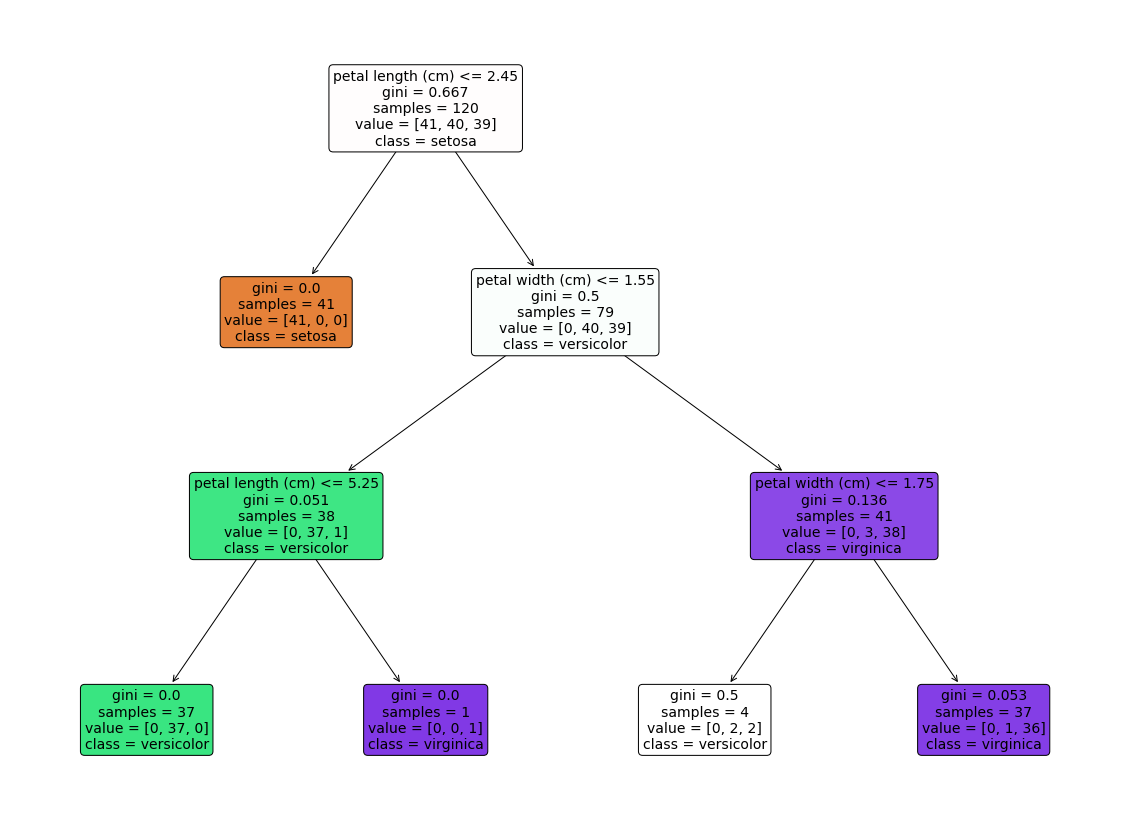

In [2]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 15))
tree.plot_tree(model,
                class_names=iris.target_names, 
                feature_names=iris.feature_names,
                impurity=True, filled=True, 
                rounded=True, fontsize=14)

#### Decision Tree 실습 02

two_moon 데이터 결정트리 만들기

In [3]:
# !pip install mglearn

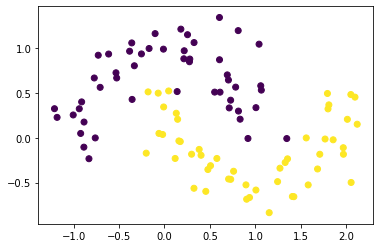

In [4]:
import mglearn
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.2, random_state=0)

# 훈련/테스트 데이터 준비
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

# 데이터 시각화
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
# 모델 생성과 학습
# max_depth를 주지 않으면 과대적합 가능성 높음
model = DecisionTreeClassifier(max_depth=3, random_state=13)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [6]:
# 평가
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print('Score: {}'.format(model.score(X_train, y_train)))
print('정확도: {}'.format(accuracy_score(y_test, pred)))

Score: 0.9066666666666666
정확도: 0.84


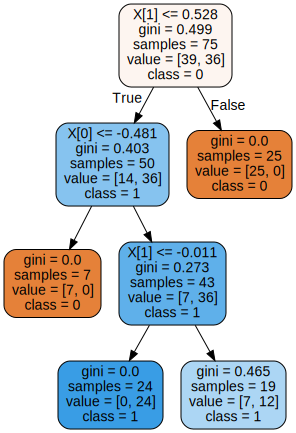

In [7]:
# 결정트리 규칙을 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="tree.dot",
               class_names=["0", "1"],
               impurity=True, filled=True, rounded=True)

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [8]:
# 트리 특성 중요도
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[0.29509409 0.70490591]


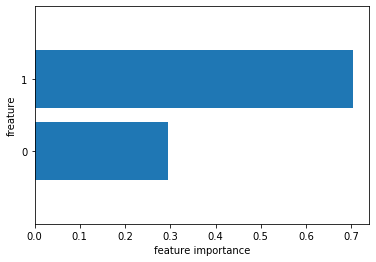

In [9]:
# 특성 중요도 시각화
import numpy as np

def plot_feature_importances(model, X):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("feature importance")
    plt.ylabel("freature")
    plt.ylim(-1, n_features)

plot_feature_importances(model, X)

#### 분류 결과 시각화

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def plot_decision_boundary(model, X, y):
    padding=0.15
    res=0.01
    
    # 데이터 세트의 x, y의 최대 값과 최소값
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    
    # x와 y의 범위
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    # 범위에 패딩 추가
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

    # 위의 포인트 범위로 메쉬그리드를 생성
    xx,yy = np.meshgrid( np.arange(x_min,x_max,res), np.arange(y_min,y_max,res) )
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    # 모델을 사용하여 그리드 라벨의 각 지점에서 클래스를 예측하여 2D 배열을 벡터로 변환
    # c_ concatenates 예측을 수행 할 하나의 긴 벡터를 만듭니다.
    # 마지막으로 예측 벡터는 원래 데이터 형태로 재구성됩니다.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])   
    Z = Z.reshape(xx.shape)
    
    # contourf() 를 이용하여 그리드에 class boundary를 시각화
    plt.figure(figsize=(8,6))
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    
    # 원래 데이터와 레이블을 시각화
    plt.scatter(X[:,0], X[:,1], s=35, c=y, cmap=plt.cm.Spectral)

<Figure size 792x288 with 0 Axes>

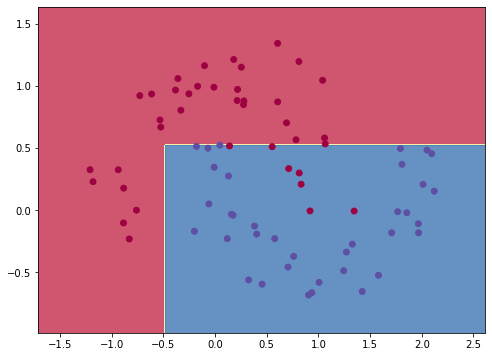

In [11]:
# 분류 결과 시각화
import numpy as np

plt.figure(figsize=(11,4))
plot_decision_boundary(model, X_train, y_train)
plt.show()

#### 결정트리 과적합(Overfitting)


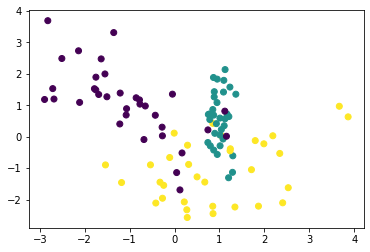

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X, y = make_classification(n_features=2, n_redundant=0,
                           n_classes=3,  n_clusters_per_class=1,
                           random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화
# 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X[:,0], X[:,1], c=y)

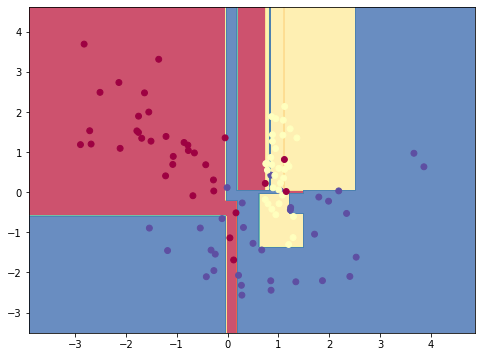

In [13]:
# 결정기준 경계를 시각화
# 결정트리 생성에 별다른 제약이 없도록 하이퍼 파라미터를 디폴트로 생성
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
model = DecisionTreeClassifier()
model.fit(X, y)
plot_decision_boundary(model, X, y)

- 일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음
- 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준으로 인해 결정 기준 경계가 많아지고 복잡해짐
- 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예측 정확도가 떨어지게 됨


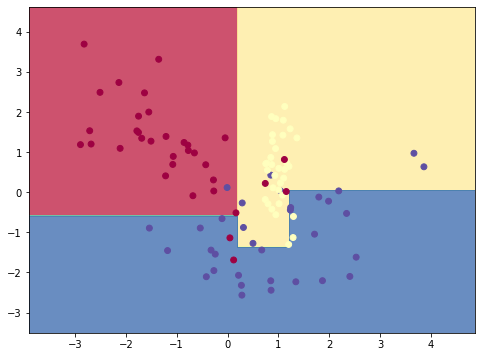

In [14]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
# 6개 이하의 데이터는 리프 노드를 생성할 수 있도록 리프 노드 생성 규칙을 완화
model = DecisionTreeClassifier(min_samples_leaf=6)
model.fit(X, y)
plot_decision_boundary(model, X, y)

- 이상치에 크게 반응하지 않으면서 좀더 일반화된 분류 규칙에 따라 분류됨
- 테스트 데이터 세트는 학습 데이터 세트와는 다른 데이터 세트인데, 학습 데이터에만 지나치게 최적화된 분류 기준은 오히려 테스트 데이터 세트에서 정확도를 떨어뜨릴 수 있음

#### Decision Tree 실습 03

유방암 데이터에 결정트리 적용 및 사전 가지치기

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# stratify : 지정한 Data의 비율을 유지한다. 
# 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, 
# stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한채 분할된다.
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target,  #테스트 데이터 비율을 유지해라
                                                    random_state=42)

In [34]:
# 모델학습
# 모든 리프 노드가 순수노드이면 훈련 세트 정확도는 100%
model = DecisionTreeClassifier(random_state=0, min_samples_leaf=10)
model.fit(X_train, y_train)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))
pred = model.predict(X_test)
print('예측 정확도: {}'.format(accuracy_score(y_test, pred)))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.951
예측 정확도: 0.951048951048951


- 트리의 깊이를 제한하면 과대적합이 줄어듦
- 훈련 세트의 정확도를 떨어뜨리지만 테스트 세트의 성능은 개선

In [37]:
# 사전가지치기
# 훈련 데이터에 완전히 학습되기 전에 트리의 성장을 막음
# 1) max_depth=4 : 연속된 질문을 최대 (4)개로 제한
model = DecisionTreeClassifier(min_samples_leaf=10, random_state=0)
model.fit(X_train, y_train)

# 정확도 0.951048951048951
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 0.962
테스트 세트 정확도: 0.951


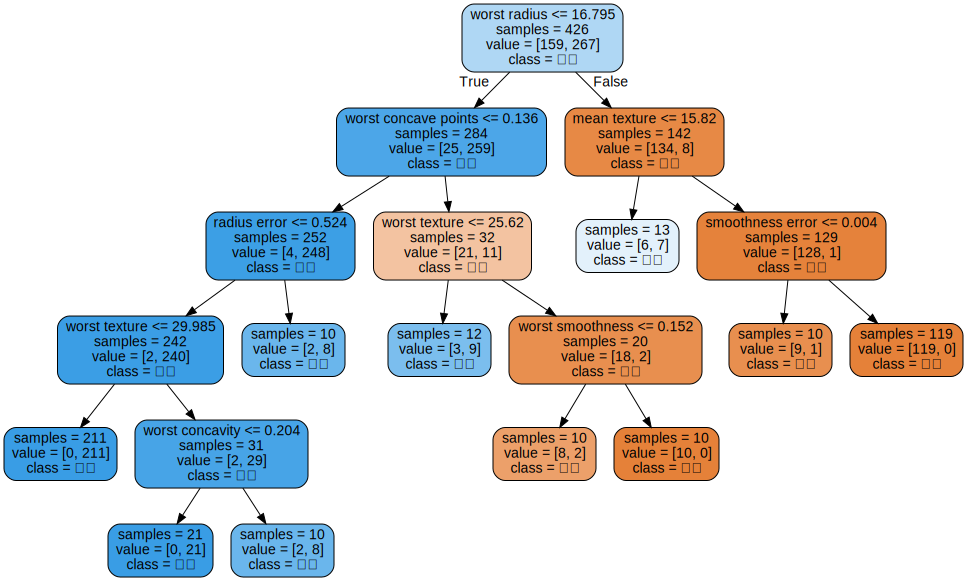

In [38]:
# 결정트리 시각화
from sklearn.tree import export_graphviz
import graphviz

# export_graphviz(model, out_file="tree.dot",
#                class_names=["악성", "양성"],
#                feature_names=cancer.feature_names,
#                impurity=False, filled=True, rounded=True)

# with open("tree.dot", encoding='UTF-8') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

#외부에 저장하지 않고 바로 그래프를 그리는 방법 
dot_graph = export_graphviz(model, out_file=None,
               class_names=["악성", "양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True, rounded=True)

display(graphviz.Source(dot_graph))

- 트리를 시각화하면 알고리즘의 예측이 어떻게 이뤄지는지 잘 이해할 수 있으며 비전문가에게 머신러닝 알고리즘을 설명하기에 좋음
- 깊이가 4만 되어도 트리는 매우 복잡해지고 트리가 더 깊어지면(10 정도의 깊이는 보통입니다) 한눈에 보기가 힘들어짐

- 트리를 조사할 때는 많은 수의 데이터가 흐르는 경로를 찾아보면 좋음

- 시각화에서 각 노드에 적힌 samples는 각 노드에 있는 샘플의 수를 나타내며 value는 클래스당 샘플의 수를 제공

- 루트 노드의 오른쪽 가지를 따라가면(worst radius > 16.795) 악성 샘플이 134개, 양성 샘플이 8개인 노드를 만듬

- 이 방향의 트리 나머지는 이 8개의 양성 샘플을 더 세부적으로 분리

- 첫 노드에서 오른쪽으로 분리된 142개 샘플 중 거의 대부분(132개)이 가장 오른쪽 노드로 감

- 루트 노드에서 왼쪽으로 간 데이터, 즉 worst radius <= 16.795인 데이터는 악성 샘플이 25개이고 양성 샘플이 259개
- 대부분의 양성 샘플은 왼쪽에서 두 번째 노드에 할당되고 나머지 리프 노드 대부분은 매우 적은 양의 샘플만 가지고 있음


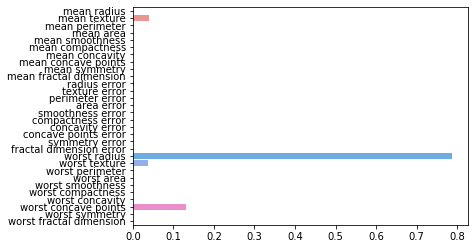

In [19]:
# 특성 중요도 시각화
# feature importance를 column 별로 시각화 하기 
import seaborn as sns
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

- 첫 번째 노드에서 사용한 특성(“worst radius”)이 가장 중요한 특성으로 나타남

- 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 우리의 관찰을 뒷받침해줌

- 그러나 어떤 특성의 feature_importance_ 값이 낮다고 해서 이 특성이 유용하지 않다는 뜻은 아님

- 단지 트리가 그 특성을 선택하지 않았을 뿐이며 다른 특성이 동일한 정보를 지니고 있어서일 수 있음

타이타닉 데이터 사용

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir(r'C:\Apps\temp')

titanic_data = pd.read_excel("titanic.xls")
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [44]:
#결측치 확인
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [45]:
# 이상치 확인
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


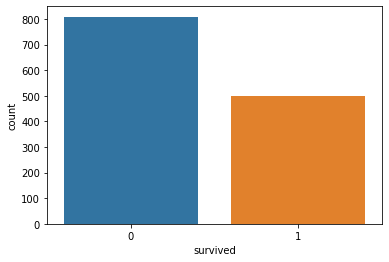

In [46]:
#생존자 수 확인
import seaborn as sns

# countplot: 방주형 변수의 빈도수를 시각화
sns.countplot('survived', data=titanic_data)

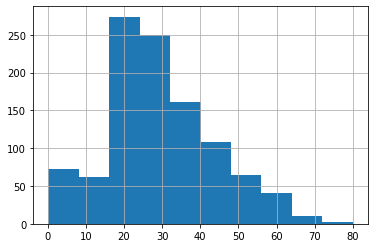

In [47]:
# 나이순으로 숫자 보기
titanic_data['age'].hist()

In [48]:
#선실 등급별 상황
titanic_data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


### heatmap

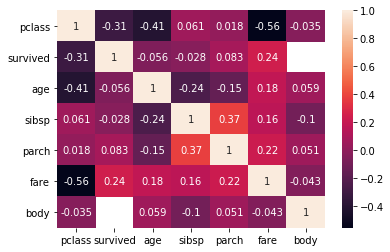

In [51]:
#특성의 상관관계 분석
sns.heatmap(titanic_data.corr(), annot=True)

In [62]:
#객실 등급(pclass)별,  연령대별, 성별비교
titanic_data['age_cat']=pd.cut(titanic_data['age'], bins = [0,10,20,50,100], 
                       labels = ['baby', 'teenage', 'adult', 'old'],
                        include_lowest=True)
print(titanic_data['age_cat'])

0         adult
1          baby
2          baby
3         adult
4         adult
         ...   
1304    teenage
1305        NaN
1306      adult
1307      adult
1308      adult
Name: age_cat, Length: 1309, dtype: category
Categories (4, object): [baby < teenage < adult < old]


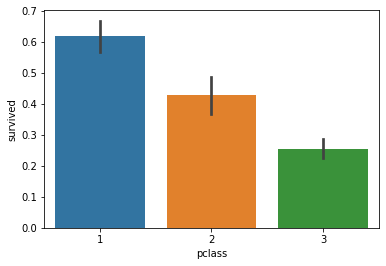

In [59]:
sns.barplot('pclass', 'survived', data=titanic_data)

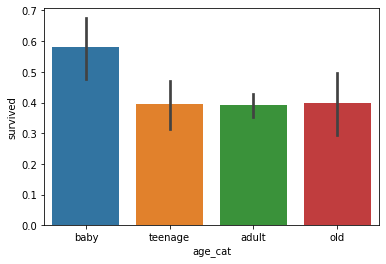

In [61]:
sns.barplot('age_cat', 'survived', data=titanic_data)

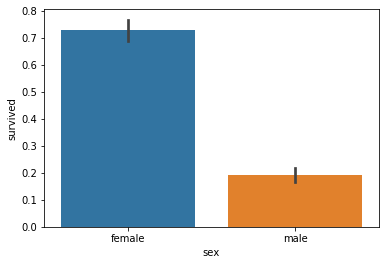

In [57]:
sns.barplot('sex', 'survived', data=titanic_data)

In [63]:
#연령대별 생존여부 분표 비교
#커널밀도추정 KDE: 데이터 분포를 확인
sns.kdeplot(titanic_data['age'][(titanic_data['survived']==0) & (titanic_data['age'].notnull()) ]. color=blue)

SyntaxError: keyword can't be an expression (<ipython-input-63-d033855ebab9>, line 3)

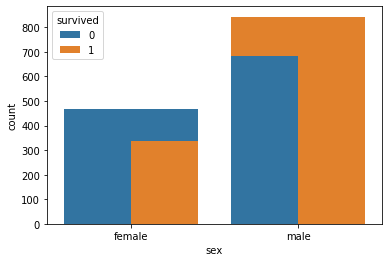

In [66]:
#성별 생존자 수 비교

sns.countplot('sex', data=titanic_data)
sns.countplot('sex', hue='survived', data=titanic_data)